In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
infiles = {
    'ACCESS-ESM1-5': 'example_data/FFDIx_yr_ACCESS-ESM1-5_ssp370_ensemble_aus-states_1850-2100.csv',
}

In [3]:
df_dict = {}
df_dict['ACCESS-ESM1-5'] = pd.read_csv(infiles['ACCESS-ESM1-5'])

In [4]:
df_dict['ACCESS-ESM1-5']

,year,model,run,experiment,NSW,VIC,QLD,SA,WA,TAS,NT,AUS
0,1950,ACCESS-ESM1-5,r1i1p1f1,historical,33.77,22.46,32.00,35.80,42.76,8.59,38.27,33.35
1,1950,ACCESS-ESM1-5,r2i1p1f1,historical,45.39,37.52,41.47,32.22,54.22,7.20,51.20,43.91
2,1951,ACCESS-ESM1-5,r1i1p1f1,historical,38.49,30.01,34.18,34.79,56.65,7.69,50.21,39.98
3,1951,ACCESS-ESM1-5,r2i1p1f1,historical,40.30,28.99,35.04,38.57,46.24,9.67,49.19,38.94
4,1952,ACCESS-ESM1-5,r1i1p1f1,historical,48.22,41.62,38.32,54.88,63.28,7.15,58.57,47.32
...,...,...,...,...,...,...,...,...,...,...,...,...
297,2098,ACCESS-ESM1-5,r2i1p1f1,ssp370,62.44,40.57,42.19,45.77,59.37,9.86,56.66,49.99
298,2099,ACCESS-ESM1-5,r1i1p1f1,ssp370,61.62,55.08,42.84,59.82,63.87,13.26,59.94,53.24
299,2099,ACCESS-ESM1-5,r2i1p1f1,ssp370,62.30,56.73,40.75,59.78,59.92,11.53,56.70,51.59
300,2100,ACCESS-ESM1-5,r1i1p1f1,ssp370,62.92,56.78,42.73,69.71,64.65,10.89,64.43,54.79


In [5]:
def plot_location(model, location, start_year=1950):
    """Scatterplot for a given location"""

    df = df_dict[model]
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df[df['year'] >= start_year],
        x='year',
        y=location,
        hue='run',
    )
    ax.set_ylabel('FFDIx')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()

In [6]:
def plot_dist(model, location, start_year=1950, end_year=2014):
    """Histogram for a given location"""

    df = df_dict[model]
    df_ref = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    fig, ax = plt.subplots()
    sns.histplot(
        ax=ax,
        data=df_ref,
        x=location,
    )
    ax.set_ylabel('FFDIx')
    ax.set_title(f'{model} - {location}')
    ax.grid()
    plt.show()
    plt.close()

In [44]:
def plot_model_odds(
    model,
    location,
    ref_start=1950,
    ref_end=2014,
    runs_subsets=[],
):
    """Odds of a year higher than a given quantile for a given location."""

    fig, ax = plt.subplots()
    
    df = df_dict[model]
    runs_list = df['run'].unique()
    iter_runs = runs_subsets + [len(runs_list),]
    for nruns in iter_runs:
        runs = runs_list[0:nruns]
        df = df_dict[model]
        df = df[df['run'].isin(runs)]
        df_ref = df[(df['year'] >= ref_start) & (df['year'] <= ref_end)]
        p98 = df_ref[location].quantile(0.98)
        print(f'98th percentile = {p98} ({ref_start}-{ref_end}; {nruns} runs)') 
        window = nruns * 20
        odds = df[location].rolling(window, step=nruns, center=True).apply(lambda s: (sum(s > p98) / window) * 100)
        odds.index = df['year'].unique()
        odds = odds.dropna()
        sns.lineplot(
            ax=ax,
            data=odds,
            label=f'{nruns} runs',
        )
    ax.set_xlabel('year')
    ax.set_ylabel('odds of exceeding 1-in-50 year event (%)') 
    ax.set_title(f'FFDIx - {model} - {location}')
    ax.grid()
    plt.show()
    plt.close()

In [8]:
def plot_ensemble_odds(
    location,
    ref_start=1950,
    ref_end=2014,
):
    """Ensemble odds of a year higher than a given quantile for a given location."""

    fig, ax = plt.subplots()
    for model, df in df_dict.items():
        df_ref = df[(df['year'] >= ref_start) & (df['year'] <= ref_end)]
        p98 = df_ref[location].quantile(0.98)
        print(f'98th percentile = {p98} ({ref_start}-{ref_end}; {model})')
        nruns = len(df['run'].unique())
        window = nruns * 20
        odds = df[location].rolling(window, step=nruns, center=True).apply(lambda s: (sum(s > p98) / window) * 100)
        odds.index = df['year'].unique()
        odds = odds.dropna()
        sns.lineplot(
            ax=ax,
            data=odds,
            label=f'{model}',
        )
    ax.set_xlabel('year')
    ax.set_ylabel('odds of exceeding 1-in-50 year event (%)') 
    ax.set_title(f'FFDIx - {location}')
    ax.grid()
    plt.show()
    plt.close()

## ACCESS-ESM1-5

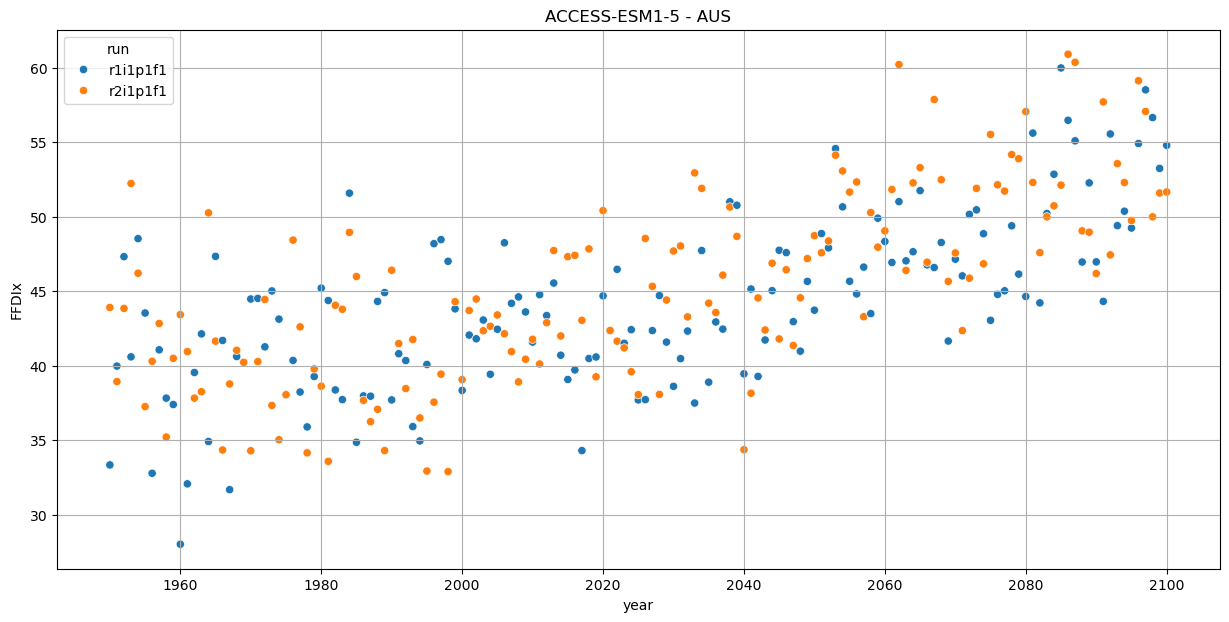

In [9]:
plot_location('ACCESS-ESM1-5', 'AUS')

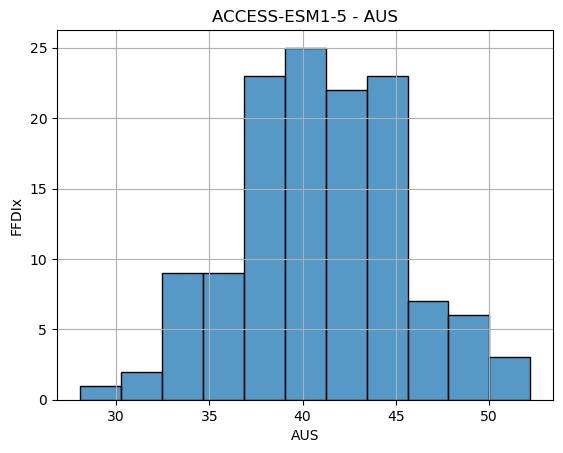

In [10]:
plot_dist('ACCESS-ESM1-5', 'AUS')

98th percentile = 49.50020000000001 (1950-2014; 2 runs)


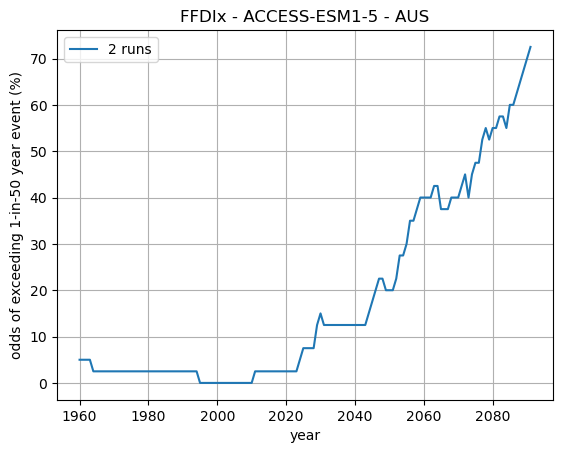

In [45]:
plot_model_odds('ACCESS-ESM1-5', 'AUS')

98th percentile = 54.8054 (1950-2014; 2 runs)


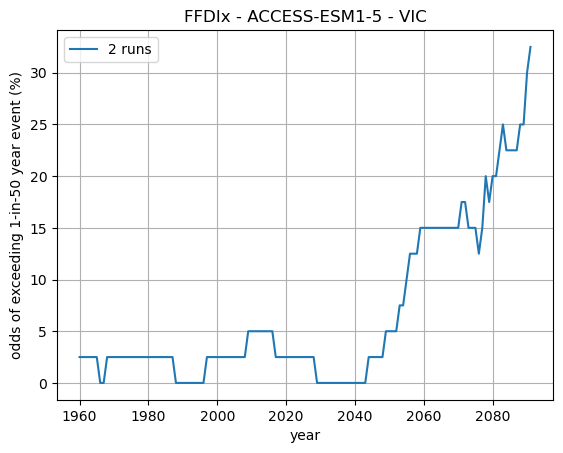

In [46]:
plot_model_odds('ACCESS-ESM1-5', 'VIC')

98th percentile = 61.9342 (1950-2014; 2 runs)


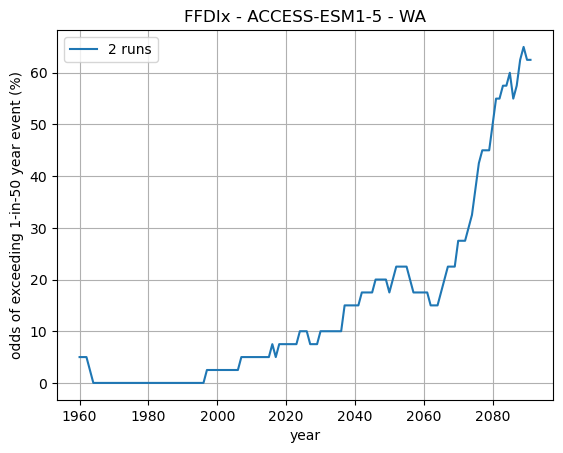

In [47]:
plot_model_odds('ACCESS-ESM1-5', 'WA')